In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("data/output/final_with_states.csv", parse_dates = ['date'])

df['date_day'] = pd.to_datetime(df['date']).dt.date
df['date_week'] = df['date'].dt.strftime('%Y-%U')
df['date_month'] = df['date'].dt.strftime('%Y-%m')

df_US = df.loc[df['country']== 'US']
df_GB = df.loc[df['country']== 'GB']

print(df)

                   valid_id                      date         full_name  \
0       1249933360375480320 2020-04-14 05:31:50+00:00   Zürich, Schweiz   
1       1249934504543870978 2020-04-14 05:36:23+00:00   Ibadan, Nigeria   
2       1249936139911192576 2020-04-14 05:42:53+00:00     Jaipur, India   
3       1249937561083990016 2020-04-14 05:48:31+00:00       हिसार, भारत   
4       1249938467661938688 2020-04-14 05:52:08+00:00     Colina, Chile   
...                     ...                       ...               ...   
392607  1462570347790802951 2021-11-21 23:55:18+00:00     Corvallis, OR   
392608  1462585007503855621 2021-11-22 00:53:33+00:00  Varennes, Québec   
392609  1462592006216159234 2021-11-22 01:21:22+00:00       Ashland, VA   
392610  1462594688989507584 2021-11-22 01:32:02+00:00     Kentucky, USA   
392611  1462596319948640263 2021-11-22 01:38:31+00:00         Tampa, FL   

       country         lon        lat  followers  retweets  replies  likes  \
0           CH    8.5

<AxesSubplot:xlabel='date'>

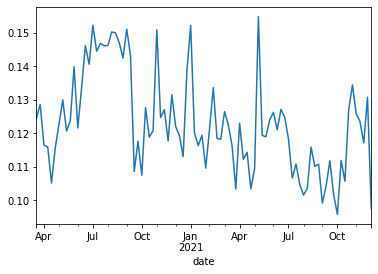

In [114]:
#Global mean sentiment over time
df3 = df.set_index('date')
df3 = df3['score'].resample('W').mean() # change 'W' to 'M' to see monthly chenges

df3.plot()
#this plot shows a nice cyclicity in sentiments, e.g. it can be seen how the 2nd/3rd wave is reflected in a decline of sentiment score
#while the vaccine becoming ready resulted in a spike in January

<AxesSubplot:xlabel='date', ylabel='Mean sentiment score'>

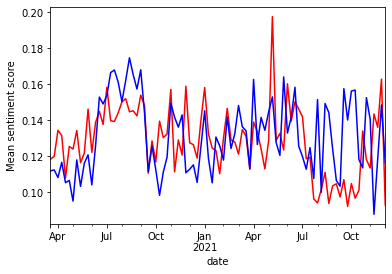

In [61]:
#Mean sentiment score over time in US and GB
df4 = df_US.set_index('date')
df4 = df4['score'].resample('W').mean()
df4.plot(color='red')
plt.ylabel('Mean sentiment score')


df5 = df_GB.set_index('date')
df5 = df5['score'].resample('W').mean()
df5.plot(color='blue')


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

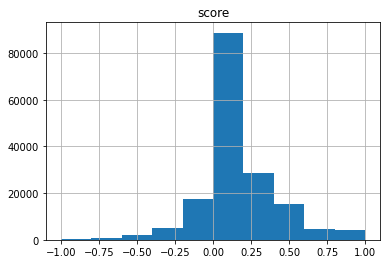

In [103]:
#Frequency of sentiment scores in the US 
df1 = df_US.filter(items=[ 'date_day', 'score'])

df1.hist()

#here I tried to create intervals for sentiment scores not sure if it's correct 
#bins = [df1.score.mean() + (df1.score.std() * v) for v in np.linspace(-1, 1, 10)]
#df1['bins'] = pd.cut(df1.score, bins=bins)
#df1.groupby('bins')['score'].count().plot.bar()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

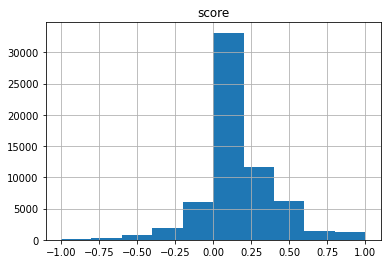

In [102]:
#Frequency of sentiment scores in GB
df2 = df_GB.filter(items=[ 'date_day', 'score'])

df2.hist()

<AxesSubplot:xlabel='date,date'>

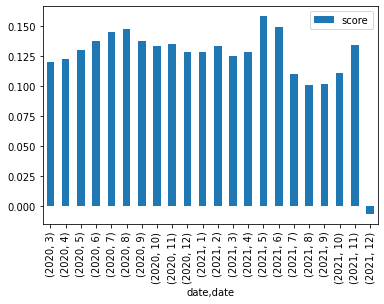

In [115]:
#Mean sentiment score in US over time, monthly bar chart
df6 = df_US.filter(items=[ 'date', 'score'])

df6.groupby([df6["date"].dt.year, df6["date"].dt.month]).mean().plot(kind="bar")


<AxesSubplot:xlabel='date,date'>

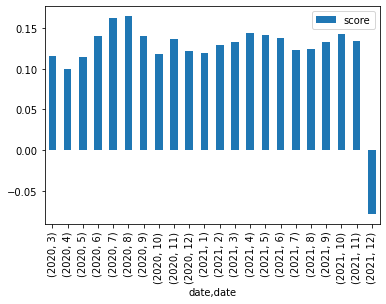

In [116]:
#Mean sentiment score in GB over time, monthly bar chart
df7 = df_GB.filter(items=[ 'date', 'score'])

df7.groupby([df7["date"].dt.year, df7["date"].dt.month]).mean().plot(kind="bar")


<AxesSubplot:xlabel='date,date'>

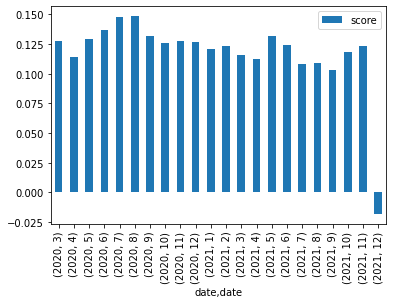

In [4]:
#Global mean sentiment score over time, monthly bar chart
df8 = df.filter(items=['country', 'date', 'score'])

df8.groupby([df8["date"].dt.year, df8["date"].dt.month]).mean().plot(kind="bar")


<AxesSubplot:xlabel='country'>

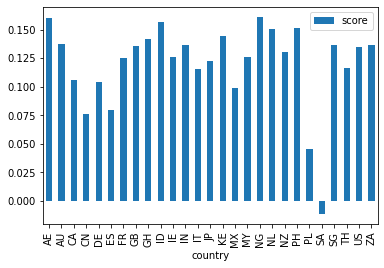

In [39]:
#Mean sentiment score over the countries with more than 1000 tweets
df9 = df.filter(items=['country', 'score'])

df10 = df9.groupby(df9["country"]).size().reset_index(name='counts') 
filtered = df10.loc[df10["counts"] > 1000] #only look at countries where we have more than 1000 tweets

df11 = df9.loc[df9["country"].isin(filtered.country)]
df11.groupby(df11["country"]).mean().plot(kind="bar")